<table>
  <tr>
    <td style="width: 30%;">
         <img src="im.jpg" alt="img.png" style="max-width: 100%; height: auto; border-radius: 5px;border-radius: 1px; box-shadow: 0 0 10px rgba(0, 123, 255, 0.5);">
      <img src="img2.png" alt="img.png" style="max-width: 100%; height: auto; border-radius: 5px;border-radius: 1px; box-shadow: 0 0 10px rgba(0, 123, 255, 0.5);">
    </td>
    <td style="width: 70%;">
      <h3 style="color: #004FCB;">DATA EXPLORATION &amp; VISUALIZATION TECHNIQUES</h3>
      <h3 style="color: #004FCB;">DATA CLEANING</h3>
      <h3 style="color:#004FCB;">ANOMALIES DETECTION AND TREATMENT</h3><hr>   
        <table><tr><td style="width: 40%;">
        <h6 style="color:red;">🔆 Applied Domains</h6> 
      <ol style="color:#003681 ;">         
        <li>Statistics</li>
        <li>Healthcare and Medicine</li>
        <li>Finance and Economics</li>
        <li>Marketing and Customer Analytics</li>
        <li>Environmental Science</li>
        <li>Education Research</li>
        <li>Operational Reseach</li>
        <li>Government and Public Policy</li>
        <li>Psychology and Behavioral Sciences</li>
        <li>Engineering and Technology</li>
        <li>Supply Chain and Logistics</li>
        <li>Sports Analytics</li>  
        <li>Information Systems</li> 
        <li>Project Management</li> 
      </ol>
          </td>
              <td style="width: 60%;">
<h6 style="color:red;">🔆 Contact Information</h6> 

> WhatsApp
- +255675839840
- +255656848274 <hr>

> YouTube
[YouTube Channel](https://www.youtube.com/channel/UCjepDdFYKzVHFiOhsiVVffQ)

> Telegram
- +255656848274
- +255738144353
  
> PlayStore
[PlayStore Developer Page](https://play.google.com/store/apps/dev?id=7334720987169992827&hl=en_US&pli=1)

> GitHub
[GitHub Profile](https://github.com/shamiraty/)
              </td>
          </tr>
          </table>
    </td>
  </tr>
</table>

> <h4 style="color:red;"> 1. IMPORT LIBRARIES</h4>

In [96]:
import pandas as pd
import plotly.graph_objects as go
import numpy as np
from scipy.stats import norm, zscore
from sklearn.neighbors import LocalOutlierFactor
from sklearn.ensemble import IsolationForest
import plotly.express as px
from sklearn.impute import SimpleImputer



<h1 style="color:red;"> SECTION A</h1><hr>

> <h3 style="color:green;"> NULL VALUES/COLUMNS DETECTION AND TREATMENT TECHNIQUES</h3>

> <h5 style="color:red;"> 1. LOAD DATASET</h5>

In [97]:
# Load dataset
df = pd.read_csv('datasets2.csv')
df.head()

,firstname,age,resident
0,Mosi,36.0,Dodoma
1,Ayaan,NaN,Unguja North
2,Udo,21.0,Njombe
3,Zola,57.0,Singida
4,Chidinma,54.0,Mtwara


> <h5 style="color:red;"> 1. FREQUENCY /PERCENT  OF CLEAN AND NULL VALUES</h5>

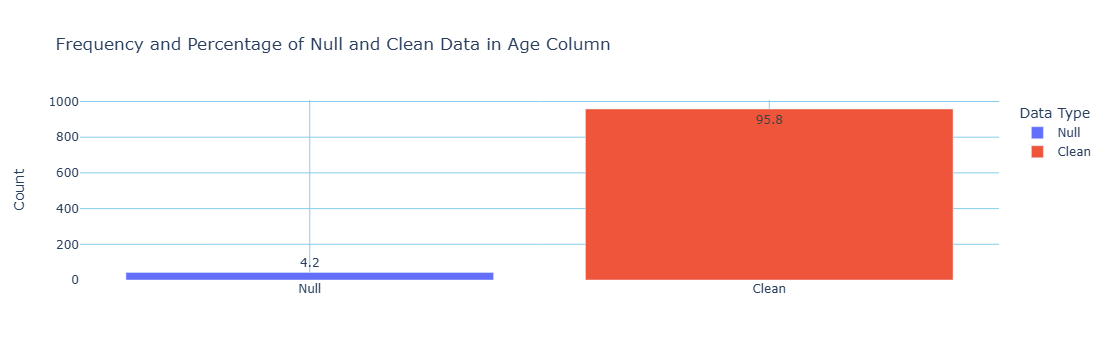

In [98]:
# Calculate null counts and clean data counts
null_counts = df['age'].isnull().sum()
clean_data_counts = df['age'].notnull().sum()

# Calculate percentages
total_count = len(df)
percent_null = (null_counts / total_count) * 100
percent_clean = (clean_data_counts / total_count) * 100

# Create a DataFrame for visualization
data = {
    'Type': ['Null', 'Clean'],
    'Count': [null_counts, clean_data_counts],
    'Percentage': [percent_null, percent_clean]
}
df_visualize = pd.DataFrame(data)

# Create a bar plot figure
fig = px.bar(df_visualize, x='Type', y='Count', text='Percentage',
             labels={'Type': 'Data Type', 'Count': 'Count', 'Percentage': 'Percentage (%)'},
             title='Frequency and Percentage of Null and Clean Data in Age Column',
             color='Type',
             hover_data={'Percentage': ':.2f%'})

# Update layout for customization
fig.update_layout(
    xaxis_title='',
    yaxis_title='Count',
    plot_bgcolor='rgba(0,0,0,0)',  # Remove background color
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add x-axis gridlines
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add y-axis gridlines
)
fig.show()


> <h5 style="color:red;"> 2. SIMPLE BAR GRAPH TO VISUALIZE NULL FIELDS </h5>

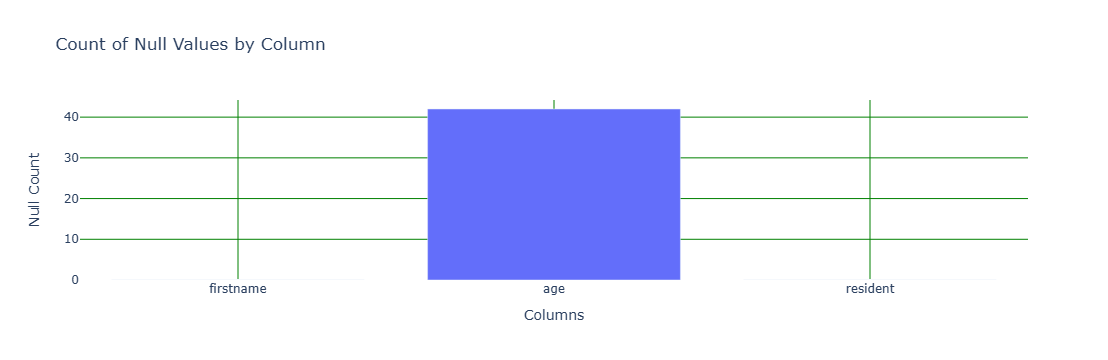

In [99]:
null_counts = df.isnull().sum()
# Create bar plot figure
fig = px.bar(
    x=null_counts.index,
    y=null_counts.values,
    labels={'x': 'Columns', 'y': 'Null Count'},
    title='Count of Null Values by Column',
)
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',)
# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='green')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='green')
fig.show()

> <h5 style="color:red;"> 3. VISUALIZE NULL FIELD BY TABLE</h5>

In [100]:
# Before imputation (if there were missing values)
print(df[df['age'].isnull()])

    firstname  age                resident
1       Ayaan  NaN            Unguja North
5    Chidinma  NaN                  Kagera
13       Femi  NaN                  Tabora
18     Jelani  NaN     Zanzibar Urban/West
23   Chidinma  NaN                  Kigoma
31      Odera  NaN                  Ruvuma
39       Femi  NaN                 Singida
46      Adama  NaN            Unguja North
58      Penda  NaN                  Kagera
72        Nia  NaN                   Geita
79    Achieng  NaN  Zanzibar Central/South
152     Salif  NaN                  Songwe
183     Penda  NaN                  Tabora
230     Kamau  NaN                  Ruvuma
265     Ayaan  NaN  Zanzibar Central/South
276     Adama  NaN                  Kagera
278     Kwame  NaN                  Mwanza
301      Dayo  NaN               Shinyanga
311   Achieng  NaN                  Mwanza
320      Yemi  NaN                Morogoro
362     Salif  NaN            Unguja North
369     Adama  NaN                   Pwani
379     Pen

> <h5 style="color:red;"> 4. TREAT NULL FIELD BY AVERAGE MEAN</h5>

In [101]:
# Apply imputation

imputer = SimpleImputer(strategy='mean')

df['age'] = imputer.fit_transform(df[['age']])

# After imputation (check if there are still any missing values)
print("After imputation:")
print(df[df['age'].isnull()])

# Print the first few rows to see the imputed values
print("First few rows after imputation:")


After imputation:
Empty DataFrame
Columns: [firstname, age, resident]
Index: []
First few rows after imputation:


> <h5 style="color:red;"> 5. OTHER NULL VALUE REPLACEMENT TECHNIQUES </h5>

In [102]:
# Mean imputation
df['age'].fillna(df['age'].mean(), inplace=True)

# Median imputation
df['age'].fillna(df['age'].median(), inplace=True)

# Mode imputation (for categorical numeric data)
df['age'].fillna(df['age'].mode()[0], inplace=True)

df.head()


,firstname,age,resident
0,Mosi,36.000000,Dodoma
1,Ayaan,41.890397,Unguja North
2,Udo,21.000000,Njombe
3,Zola,57.000000,Singida
4,Chidinma,54.000000,Mtwara


> Visualize Null Fields after Treatment

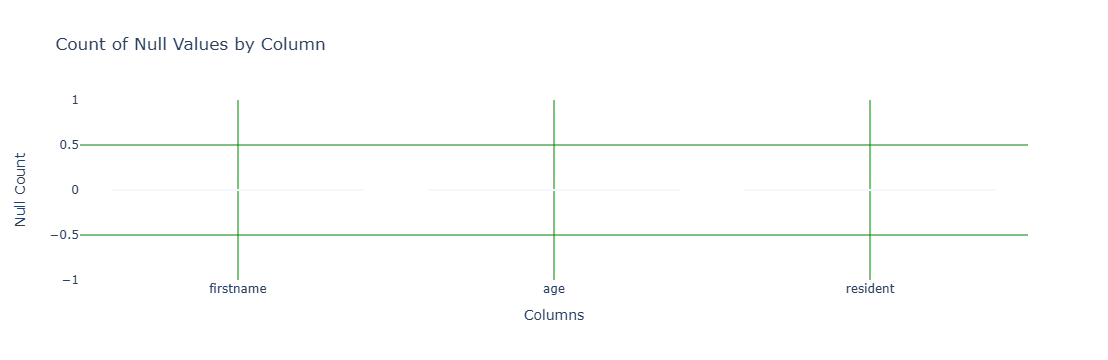

In [103]:
null_counts = df.isnull().sum()
# Create bar plot figure
fig = px.bar(
    x=null_counts.index,
    y=null_counts.values,
    labels={'x': 'Columns', 'y': 'Null Count'},
    title='Count of Null Values by Column',
)
fig.update_layout(
    plot_bgcolor='rgba(0,0,0,0)',)
# Add gridlines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='green')
fig.update_yaxes(showgrid=True, gridwidth=1, gridcolor='green')
fig.show()

<h1 style="color:red;">SECTION B</h1> <hr>

### OUTLIERS DETECTION AND TREATMENT TECHNIQUES

1. Isolation Forest | Contamination
2. Local Outlier Factor 3LOF)
3. Normal Distributions and Z-scores (X~N40:1))
4. Qu5rtiles
5. Percentile-Base6 Method
6. Outliers Treatment Techniques Winsizantion> izantion> rizantion
s [Winsoriza  
""")

<h3 style="color:green;"> A.  OUTLIERS DETECTION TECHNIQUES</h3>

> <h5 style="color:red;"> 1. NORMAL DISTRIBUTION & Z-SCORES SECTION</h5>

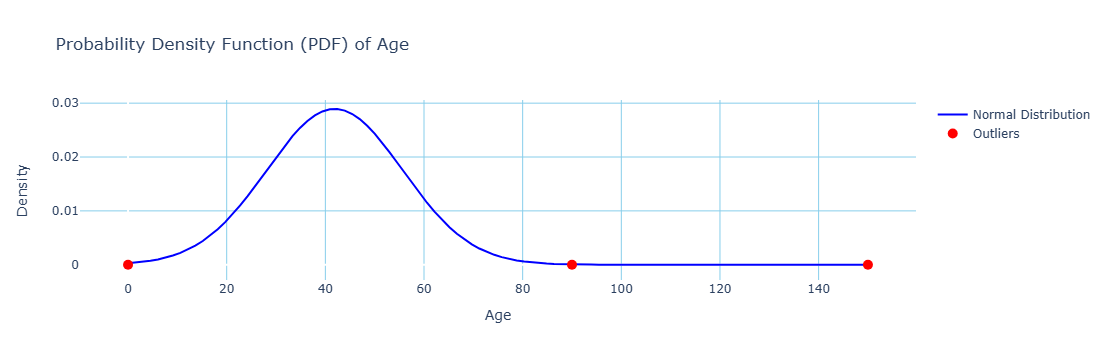

In [104]:
# Calculate min and max age for plotting
max_age = df['age'].max()
min_age = df['age'].min()

# Create figure for PDF
fig_pdf = go.Figure()

# Plot Normal distribution curve
x_values = np.linspace(min_age, max_age, 100)
normal_pdf = norm.pdf(x_values, df['age'].mean(), df['age'].std())
fig_pdf.add_trace(go.Scatter(x=x_values, y=normal_pdf, mode='lines', name='Normal Distribution', line=dict(color='blue')))

# Highlight outliers using z-scores
z_scores = zscore(df['age'])
outliers = df[(z_scores < -3) | (z_scores > 3)]
fig_pdf.add_trace(go.Scatter(x=outliers['age'], y=[0]*len(outliers), mode='markers', name='Outliers', marker=dict(color='red', size=10)))

# Update PDF figure layout
fig_pdf.update_layout(
    title='Probability Density Function (PDF) of Age',
    xaxis_title='Age',
    yaxis_title='Density',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',  # Remove background color
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add x-axis gridlines
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add y-axis gridlines
)

fig_pdf.show()

> <h5 style="color:red;"> 2. BOX PLOT SECTION</h5>

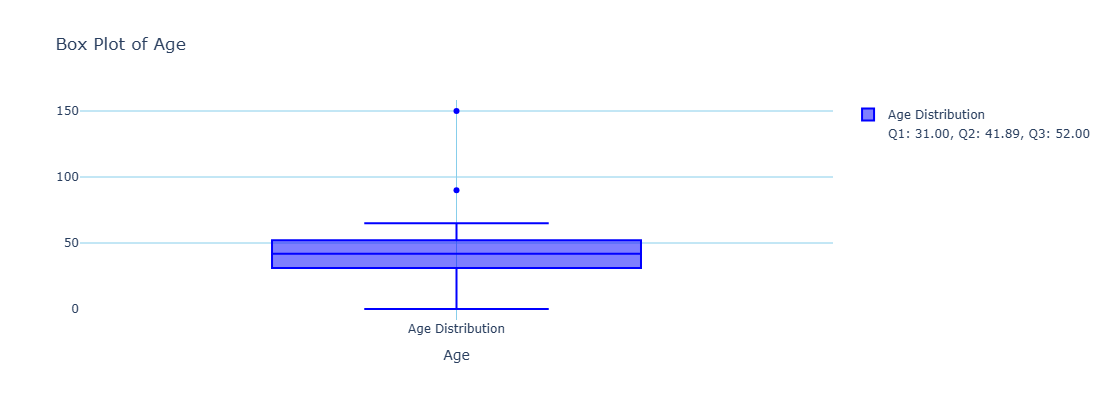

In [105]:
# Box Plot of Age
fig_box = go.Figure()
fig_box.add_trace(go.Box(y=df['age'], boxpoints='outliers', marker_color='blue', name='Age Distribution'))

# Add quartile annotations
quartiles = np.percentile(df['age'], [25, 50, 75])
quartile_text = [f"Q{i}: {quartile:.2f}" for i, quartile in enumerate(quartiles, start=1)]
fig_box.add_trace(go.Scatter(x=[None], y=[None], mode='markers', marker=dict(color='white', size=0), name=', '.join(quartile_text)))
fig_box.update_layout(
    title='Box Plot of Age',
    xaxis_title='Age',
    yaxis_title='',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',  # Remove background color
     xaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add x-axis gridlines
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add y-axis gridlines
    height=400,  # Adjust plot height
)
fig_box.show()

> <h5 style="color:red;"> 3. ISOLATION FOREST SECTION</h5>

In [106]:
# Fit the Isolation Forest model
iso_forest = IsolationForest(contamination=0.01, random_state=42)
iso_forest.fit(df[['age']])
df['anomaly'] = iso_forest.predict(df[['age']])

# Identify outliers
iso_outliers = df[df['anomaly'] == -1]

print(iso_outliers)

    firstname    age     resident  anomaly
997     Ayaan  150.0  Pemba North       -1
998     Salif    0.0       Iringa       -1
999     Adama   90.0       Kagera       -1


C:\Users\samir\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning:

X does not have valid feature names, but IsolationForest was fitted with feature names



> Scatter Plot for Isolation Forest

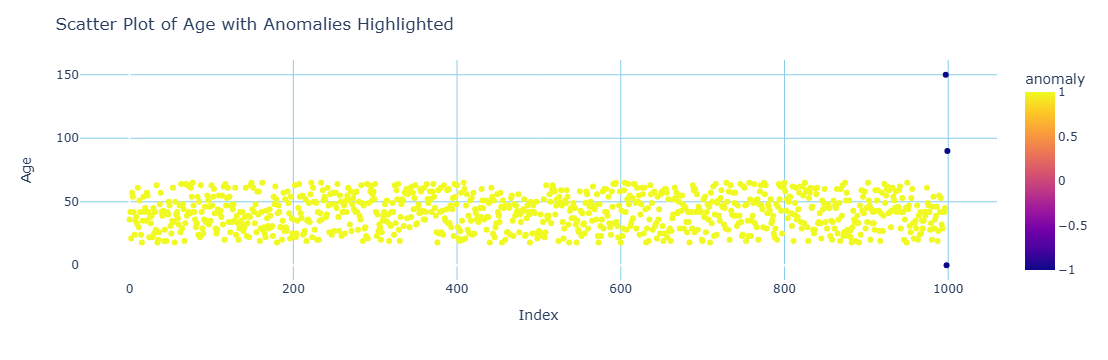

In [107]:

scatter_fig = px.scatter(df, x=df.index, y='age', color='anomaly',
                         color_discrete_map={1: 'blue', -1: 'red'},
                         labels={'color': 'Anomaly'})

scatter_fig.update_layout(
    title='Scatter Plot of Age with Anomalies Highlighted',
    xaxis_title='Index',
    yaxis_title='Age',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',  # Remove background color
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add x-axis gridlines
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add y-axis gridlines
)

scatter_fig.show()

> Box Plot for Isolation Forest

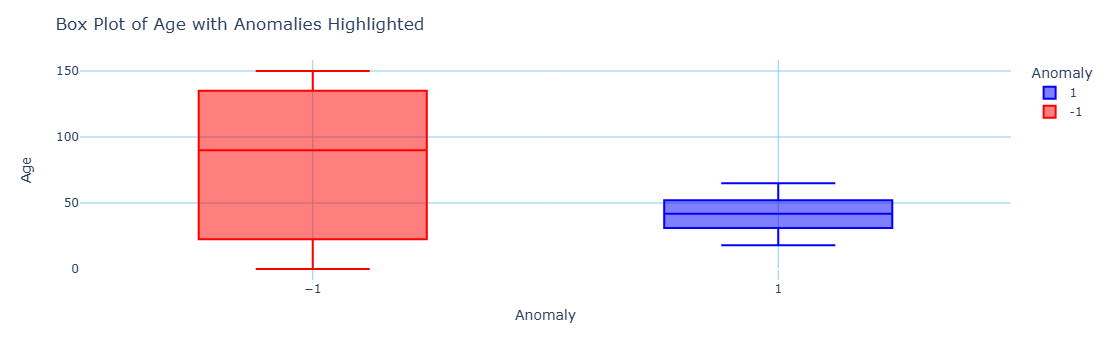

In [108]:
box_fig = px.box(df, x='anomaly', y='age', color='anomaly',
                 color_discrete_map={1: 'blue', -1: 'red'},
                 labels={'anomaly': 'Anomaly', 'age': 'Age'})

box_fig.update_layout(
    title='Box Plot of Age with Anomalies Highlighted',
    xaxis_title='Anomaly',
    yaxis_title='Age',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',  # Remove background color
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add x-axis gridlines
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add y-axis gridlines
)
box_fig.show()

> <h5 style="color:red;"> 4. LOCAL OUTLIER FACTOR (LOF) SECTION</h5>

In [109]:
# Fit the Local Outlier Factor (LOF) model
lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)
df['lof_anomaly'] = lof.fit_predict(df[['age']])
lof_outliers = df[df['lof_anomaly'] == -1]

> Scatter Plot for LOF

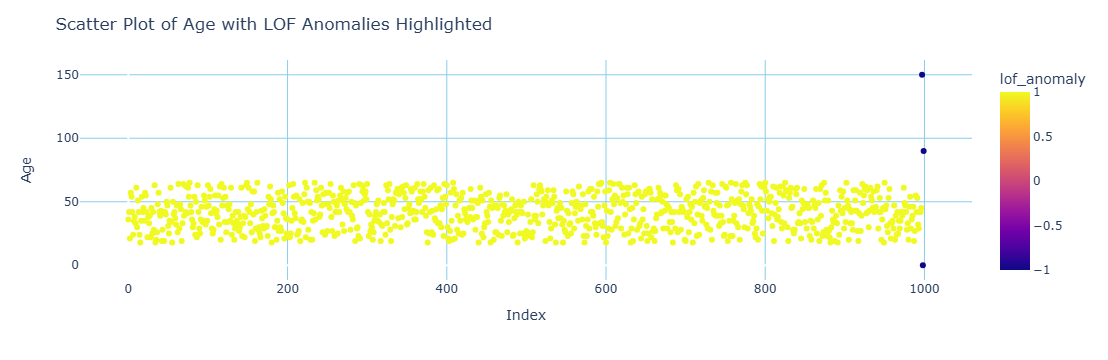

In [110]:
scatter_fig_lof = px.scatter(df, x=df.index, y='age', color='lof_anomaly',
                             color_discrete_map={1: 'blue', -1: 'red'},
                             labels={'color': 'Anomaly'})

scatter_fig_lof.update_layout(
    title='Scatter Plot of Age with LOF Anomalies Highlighted',
    xaxis_title='Index',
    yaxis_title='Age',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',  # Remove background color
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add x-axis gridlines
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add y-axis gridlines
)
scatter_fig_lof.show()

> Box Plot for LOF

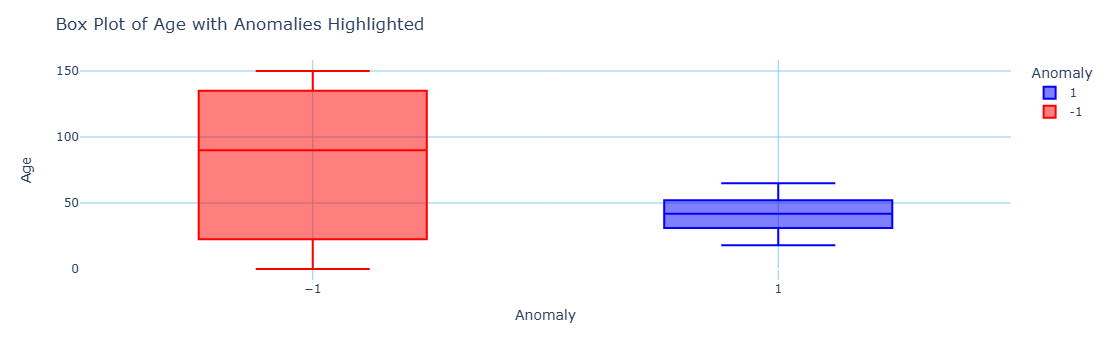

    firstname    age     resident  anomaly  lof_anomaly
997     Ayaan  150.0  Pemba North       -1           -1
998     Salif    0.0       Iringa       -1           -1
999     Adama   90.0       Kagera       -1           -1


In [111]:
box_fig_lof = px.box(df, x='lof_anomaly', y='age', color='lof_anomaly',
                     color_discrete_map={1: 'blue', -1: 'red'},
                     labels={'lof_anomaly': 'Anomaly', 'age': 'Age'})
box_fig_lof.update_layout(
    title='Box Plot of Age with Anomalies Highlighted',
    xaxis_title='Anomaly',
    yaxis_title='Age',
    showlegend=True,
    plot_bgcolor='rgba(0,0,0,0)',  # Remove background color
    xaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add x-axis gridlines
    yaxis=dict(showgrid=True, gridwidth=1, gridcolor='skyblue'),  # Add y-axis gridlines
)
box_fig_lof.show()
print(lof_outliers)

> <h5 style="color:red;"> 5. PERCENTILE-BASED METHOD</h5>


In [112]:
# Define thresholds for top and bottom percentiles
top_percentile = 95
bottom_percentile = 5

# Calculate percentile values
top_threshold = np.percentile(df['age'], top_percentile)
bottom_threshold = np.percentile(df['age'], bottom_percentile)

# Identify outliers
percentile_outliers_top = df[df['age'] > top_threshold]
percentile_outliers_bottom = df[df['age'] < bottom_threshold]

In [113]:
# Print outliers
print("Top Percentile Outliers")
print(percentile_outliers_top.head())

Top Percentile Outliers
    firstname   age       resident  anomaly  lof_anomaly
63       Lulu  64.0          Pwani        1            1
69     Ifeoma  64.0          Tanga        1            1
77       Dayo  65.0  Dar es Salaam        1            1
117    Jelani  64.0      Shinyanga        1            1
149      Yemi  65.0         Mwanza        1            1


In [114]:
print("Bottom Percentile Outliers")
print(percentile_outliers_bottom.head())

Bottom Percentile Outliers
   firstname   age     resident  anomaly  lof_anomaly
15   Achieng  18.0  Pemba South        1            1
34     Gimba  18.0       Katavi        1            1
42     Penda  19.0      Manyara        1            1
45      Femi  19.0       Songwe        1            1
55     Odera  18.0        Mbeya        1            1


<h1 style="color:red;"> SECTION C</h1>
<hr>
<h3 style="color:blue;"> OUTLIERS TREATMENT TECHNIQUES SECTION</h3>

> Winsorization, or winsorizing, is the process of transforming the data by limiting the extreme values, that is, the outliers, to a certain arbitrary value, closer to the mean of the distribution. Winsorizing is different from trimming because the extreme values are not removed, but are instead replaced by other values. A typical strategy involves setting outliers to a specified percentile


In [115]:
# Define the percentile values for Winsorization
winsor_percentile = 5  # Set to 5th and 95th percentile for lower and upper bounds

# Calculate Winsorization bounds
lower_bound = np.percentile(df['age'], winsor_percentile)
upper_bound = np.percentile(df['age'], 100 - winsor_percentile)

# Winsorization
df['age_winsorized'] = df['age'].clip(lower=lower_bound, upper=upper_bound)

# Concatenate original and winsorized data along columns axis
concatenated_df = pd.concat([df[['age']], df[['age_winsorized']]], axis=1)
concatenated_df.columns = ['Original Age', 'Winsorized Age']

# Display concatenated data
print(concatenated_df)

     Original Age  Winsorized Age
0       36.000000       36.000000
1       41.890397       41.890397
2       21.000000       21.000000
3       57.000000       57.000000
4       54.000000       54.000000
..            ...             ...
995     41.890397       41.890397
996     45.000000       45.000000
997    150.000000       63.000000
998      0.000000       20.000000
999     90.000000       63.000000

[1000 rows x 2 columns]
